In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

<h3>Data</h3>

Created objective variable and variables of interest. 

In [19]:
df = pd.read_csv('spotify-2023.csv',encoding='unicode_escape')
df.head()

# Assuming your DataFrame is named df
# Select relevant columns
selected_columns = ['bpm', 'danceability_%', 'valence_%', 'energy_%', 'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%', 'in_apple_charts']

# Create a new DataFrame with selected columns
df_selected = df[selected_columns].copy()

# Create a binary target variable
df_selected['is_top20_apple_music'] = df['in_apple_charts'].apply(lambda x: 1 if x < 20 else 0)
df_selected

,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,in_apple_charts,is_top20_apple_music
0,125,80,89,83,31,0,8,4,263,0
1,92,71,61,74,7,0,10,4,126,0
2,138,51,32,53,17,0,31,6,207,0
3,170,55,58,72,11,0,11,15,207,0
4,144,65,23,80,14,63,11,6,133,0
...,...,...,...,...,...,...,...,...,...,...
948,144,60,24,39,57,0,8,3,13,1
949,166,42,7,24,83,1,12,6,0,1
950,92,80,81,67,4,0,8,6,0,1
951,97,82,67,77,8,0,12,5,26,0


Accuracy: 0.62
Classification Report:
              precision    recall  f1-score   support

           0       0.66      0.86      0.75       123
           1       0.43      0.19      0.27        68

    accuracy                           0.62       191
   macro avg       0.55      0.53      0.51       191
weighted avg       0.58      0.62      0.58       191



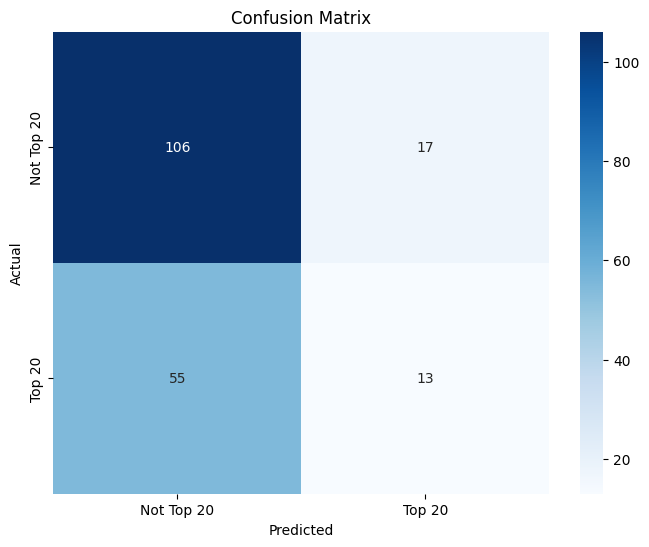

             Variable  Coefficient
7       speechiness_%     0.036422
3            energy_%    -0.009915
5  instrumentalness_%     0.007684
0                 bpm    -0.006072
1      danceability_%     0.003982
4      acousticness_%     0.002828
2           valence_%    -0.002508
6          liveness_%     0.001855


In [21]:
# Split the data into training and testing sets
X = df_selected.drop(['is_top20_apple_music','in_apple_charts'], axis=1)
y = df_selected['is_top20_apple_music']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a logistic regression model
model = LogisticRegression(random_state=42)

# Train the model on the training set
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Print classification report
print('Classification Report:')
print(classification_report(y_test, y_pred))

# Print confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Top 20', 'Top 20'], yticklabels=['Not Top 20', 'Top 20'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Print variables sorted by absolute coefficient value
coefficients = model.coef_[0]
variables = X.columns
coefficients_df = pd.DataFrame({'Variable': variables, 'Coefficient': coefficients})
coefficients_df['Absolute Coefficient'] = abs(coefficients_df['Coefficient'])
sorted_coefficients = coefficients_df.sort_values(by='Absolute Coefficient', ascending=False)

# Print the sorted coefficients DataFrame
print(sorted_coefficients[['Variable', 'Coefficient']])
